In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)


In [6]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
df.shape

(3150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [10]:
print(f"Features names: {df.columns.values}")

Features names: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [11]:
#Checking for null or missing values
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [12]:
df.duplicated().sum()

715

In [13]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [14]:
#getting the record where verified reviews are null:
df[df['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback


In [15]:
df.dropna(inplace=True)

In [17]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [19]:
print(f"Shape of dataset after dropping null values from verified reviews column:{df.shape}")

Shape of dataset after dropping null values from verified reviews column:(3150, 5)


In [21]:
#Creaating a new columns that will calculate the length of verified reviews columns:
df['verified_review_length']=df['verified_reviews'].apply(len)

In [23]:
df.head()

,rating,date,variation,verified_reviews,feedback,verified_review_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [28]:
print(f"verified reviews:{df.iloc[10]['verified_reviews']}")
print(f"length of review:{len(df.iloc[10]['verified_reviews'])}")
print(f" length of column value:{df.iloc[10]['verified_review_length']}")


verified reviews:"I sent it to my 85 year old Dad, and he talks to it constantly."
length of review:65
 length of column value:65


# Analyzing rating columns

In [30]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

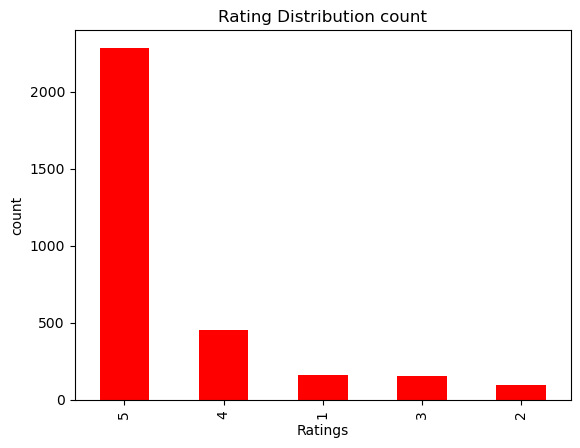

In [31]:
#plotting bar chart to visualize the total counts of each rating:
df['rating'].value_counts().plot.bar(color='red')
plt.title("Rating Distribution count")
plt.xlabel('Ratings')
plt.ylabel('count')
plt.show()

In [33]:
#Finding the percentage distribution of each rating 

print(f"Rating count - percentage distribution: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")

Rating count - percentage distribution: 
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


<Axes: ylabel='Percentage wise distrubution of rating'>

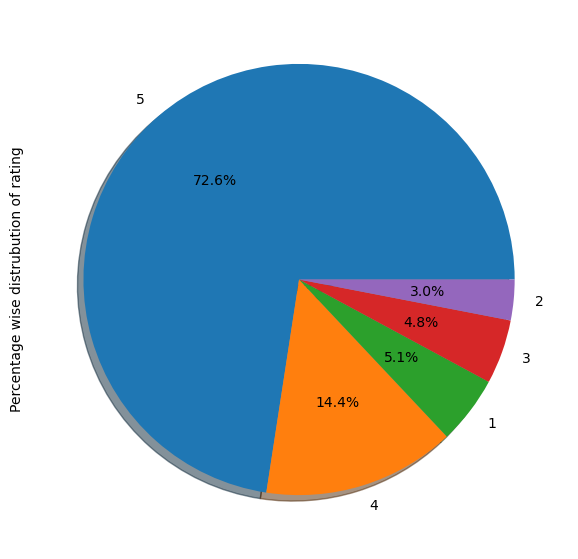

In [39]:
#plotting a pie chart
fig=plt.figure(figsize=(7,7))
Rating=df['rating'].value_counts()/df.shape[0]
Rating.plot(kind='pie',autopct="%1.1F%%",shadow=True,label='Percentage wise distrubution of rating')


# Analyzing feedback column

In [40]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [45]:
#Extracting the verified reviews value for one record with feedback = 0
df[df['feedback']==0].iloc[1]['verified_reviews']

'Sound is terrible if u want good music too get a bose'

# from the above two examples we can see that feedback 0 is negative review and 1 is positive review

In [47]:
df[df['feedback']==1].iloc[1]['verified_reviews']

'Loved it!'

Text(0, 0.5, 'count')

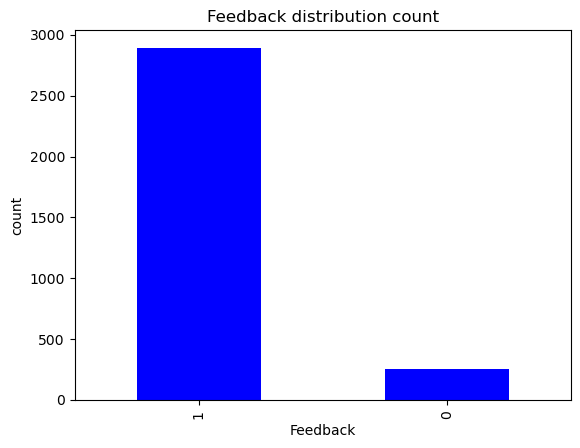

In [49]:
df['feedback'].value_counts().plot.bar(color='blue')
plt.title("Feedback distribution count")
plt.xlabel("Feedback")
plt.ylabel("count")

In [52]:
print(f"feddback value count - percentage distribution :\n{round(df['feedback'].value_counts()/df.shape[0]*100,2)}")

feddback value count - percentage distribution :
1    91.84
0     8.16
Name: feedback, dtype: float64


<Axes: ylabel='percentage of feedback distribution'>

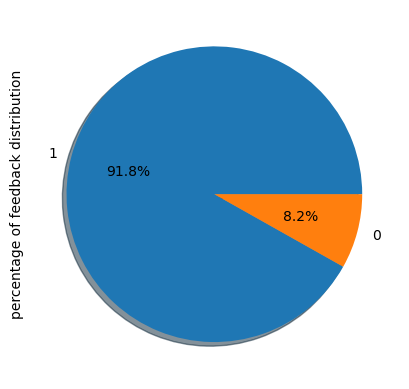

In [53]:
feedback=df['feedback'].value_counts()/df.shape[0]
feedback.plot(kind='pie',autopct='%1.1f%%',label='percentage of feedback distribution',shadow=True)

In [58]:
#Feedback = 0
df[df['feedback'] == 0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [57]:
#Feedback = 1
df[df['feedback'] == 1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

####     From the Above visualization we can see that if rating of a review is 1 or 2 then the feedback is 0(negative) and if the rating is 3,4,5then feedback is 1(positive)

# Analyzing variation column

In [59]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

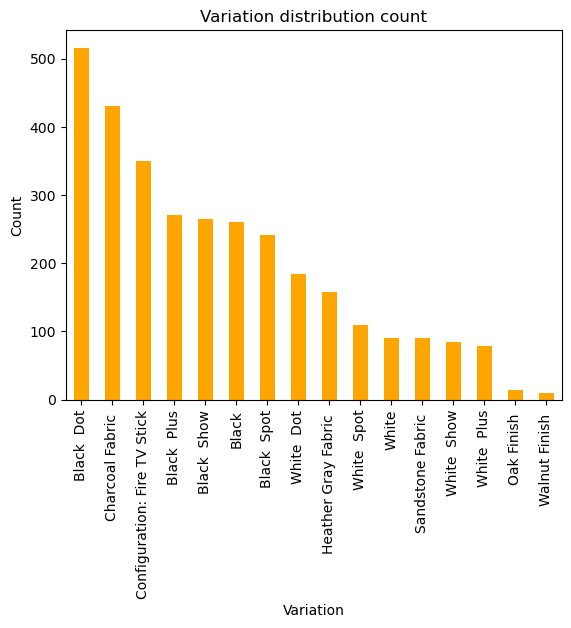

In [61]:
#Bar graph to visualize the total counts of each variation

df['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [65]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(df['variation'].value_counts()/df.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: variation, dtype: float64


In [66]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

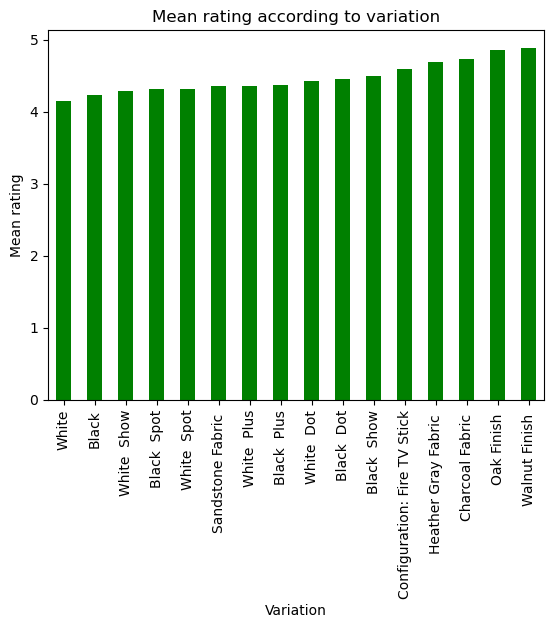

In [67]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color='green')
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

# Analyzing verified reviews column

In [68]:
df['verified_review_length'].value_counts()

1      81
11     48
13     44
8      41
22     36
       ..
400     1
198     1
397     1
582     1
401     1
Name: verified_review_length, Length: 495, dtype: int64

In [69]:
df['verified_review_length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: verified_review_length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review')]

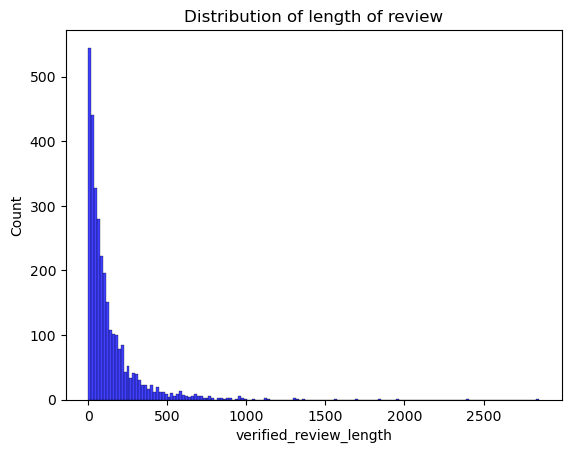

In [70]:
sns.histplot(df['verified_review_length'],color='blue').set(title='Distribution of length of review')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

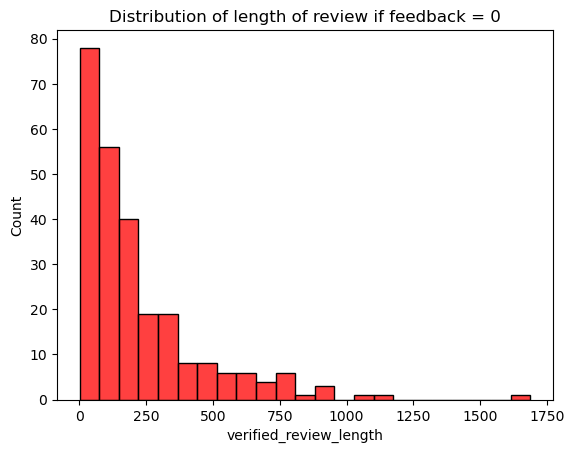

In [73]:
sns.histplot(df[df['feedback']==0]['verified_review_length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

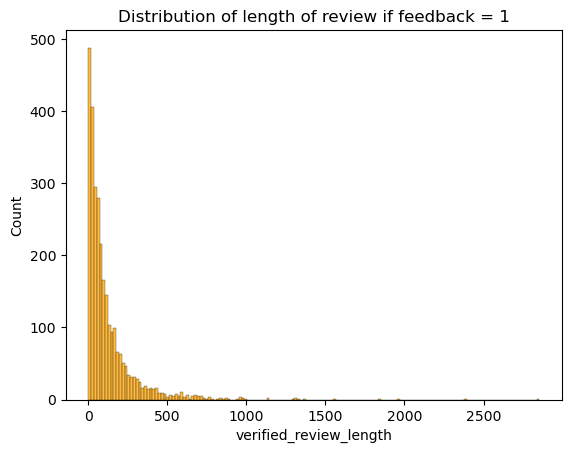

In [74]:
sns.histplot(df[df['feedback']==1]['verified_review_length'],color='orange').set(title='Distribution of length of review if feedback = 1')

# length wise mean rating

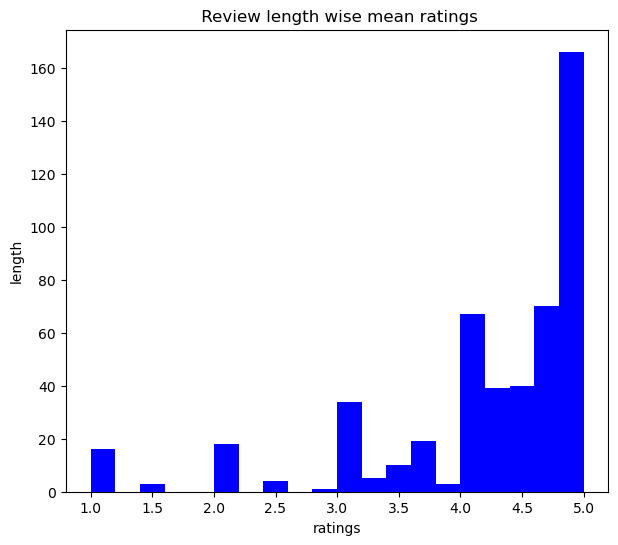

In [77]:
df.groupby('verified_review_length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [79]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
import pickle
import re

In [85]:
cv=CountVectorizer()
word=cv.fit_transform(df.verified_reviews)

In [86]:
reviews=" ".join([review for review in df['verified_reviews']])

In [89]:
reviews

'Love my Echo! Loved it! "Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home." "I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well." Music "I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do." "Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet." I think this is the 5th one I\'ve purchased. I\'m wor

In [87]:
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)


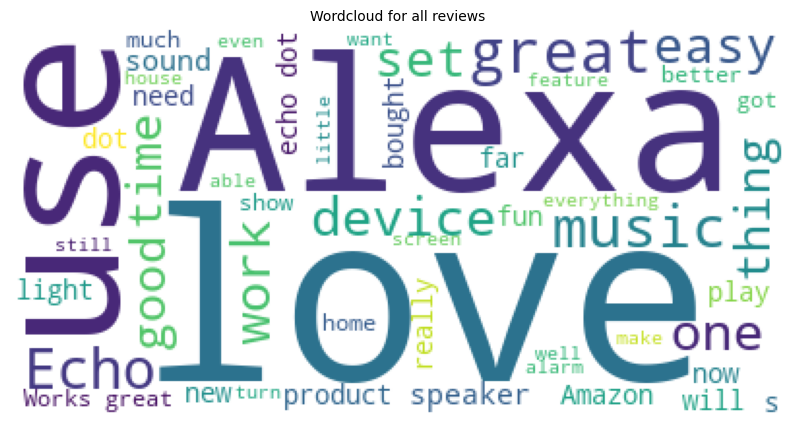

In [88]:
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [91]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

In [92]:
wc=WordCloud(background_color='white',max_words=50)

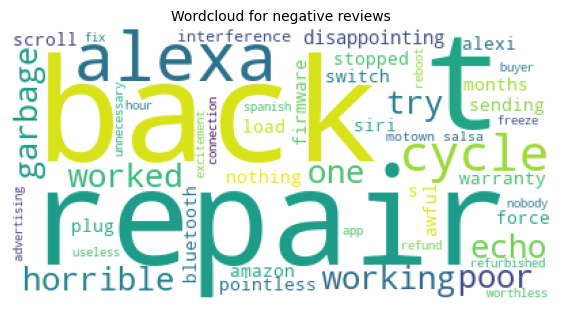

In [95]:
#Generate and plot word cloud
plt.figure(figsize=(7,10))
plt.imshow(wc.generate(unique_negative))
plt.title("Wordcloud for negative reviews",fontsize=10)
plt.axis('off')
plt.show()


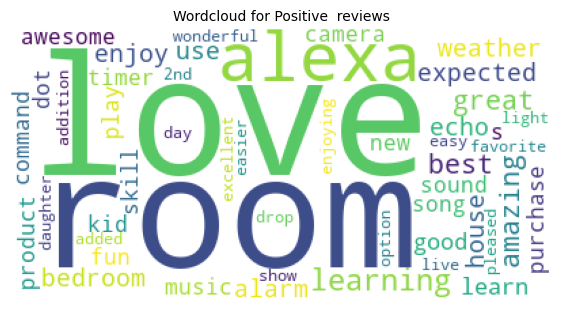

In [97]:
plt.figure(figsize=(7,10))
plt.imshow(wc.generate(unique_positive))
plt.title("Wordcloud for Positive  reviews",fontsize=10)
plt.axis('off')
plt.show()


# Preprocessing and Modelling
## To build the corpus from verified reviews we perform the following-
   ### 1.Replace any non alphabet characters with a space
   ### 2.Covert to lower case and split into words
   ### 3.Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [98]:
corpus=[]
stemmer=PorterStemmer()
for i in range(0,df.shape[0]):
    review=re.sub('[^a-zA-z]',' ',df.iloc[i]['verified_reviews'])
    review=review.lower()
    review=review.split()
    [stemmer.stem(word) for word in review if not word in  STOPWORDS]
    review=' '.join(review)
    corpus.append(review)

In [99]:
#using count vectorizer to create bag of words
cv=CountVectorizer(max_features=2500)
X=cv.fit_transform(corpus).toarray()

In [100]:
y=df['feedback'].values

In [103]:
import pickle
pickle.dump(cv,open('countVectorizer.pkl', 'wb'))

In [106]:
print("shape of x",X.shape)
print("shape of y",y.shape)

shape of x (3150, 2500)
shape of y (3150,)


In [107]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)


In [108]:
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2205, 2500)
y train: (2205,)
X test: (945, 2500)
y test: (945,)


In [109]:
X_train.max()

31

In [110]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 31
X test max value: 23


# we will scale the x_train and x_test so that values are between 0 and 1 

In [112]:
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [113]:
#Saving the scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# RandomForest Algorithm

In [118]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [120]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(x_train_scaled, y_train))
print("Testing Accuracy :", model_rf.score(x_test_scaled, y_test))

Training Accuracy : 0.9945578231292517
Testing Accuracy : 0.9375661375661376


In [121]:
#Predicting on the test set
y_preds = model_rf.predict(x_test_scaled)

In [122]:
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [123]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

In [124]:
cm

array([[ 19,  56],
       [  3, 867]], dtype=int64)

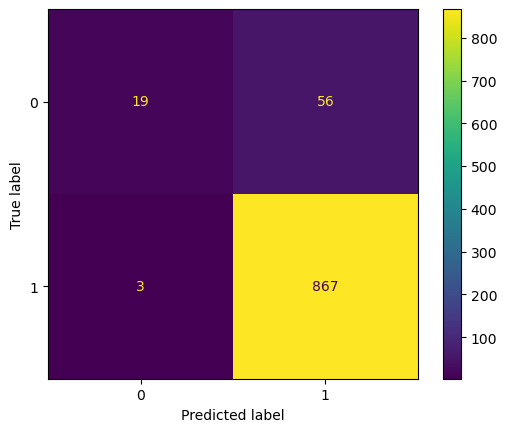

In [125]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()


# kfold cross validation

In [126]:
accuracies = cross_val_score(estimator = model_rf, X = x_train_scaled, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9301624845742491
Standard Variance : 0.007864949433928544


# Applying grid search to get the optimal parameters on random forest

In [127]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [129]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(x_train_scaled, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [131]:
#getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [132]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 97.02977607679435
Cross validation mean accuracy on test set : 92.10876478602326
Accuracy score for test set : 0.9375661375661376


# Decision tree Classifier

In [134]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_scaled, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [136]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(x_train_scaled, y_train))
print("Testing Accuracy :", model_dt.score(x_test_scaled, y_test))

Training Accuracy : 0.9945578231292517
Testing Accuracy : 0.9185185185185185


In [137]:
y_preds = model_dt.predict(X_test)

In [138]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 40  35]
 [ 98 772]]


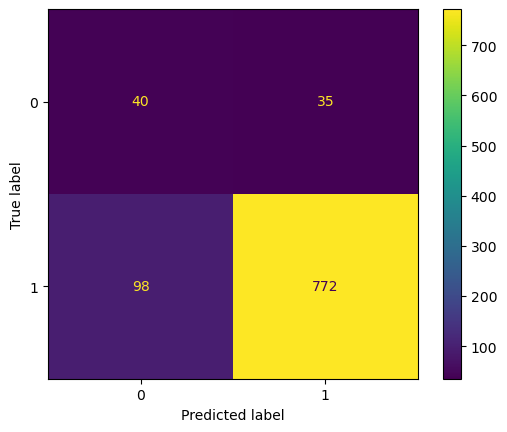

In [139]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [143]:
#saving the rf classifier
pickle.dump(model_rf,open('model_rf.pkl','wb'))

In [145]:
pickle.dump(model_dt,open('model_dt.pkl','wb'))